In [415]:
import cv2

In [416]:
import mediapipe as mp

In [417]:
image=cv2.imread('/360_F_530010960_WkmW6q8FIZ42LkEQoSRCLTNTw0WgJqKY.jpg')
H,W,_=image.shape

In [418]:
from google.colab.patches import cv2_imshow

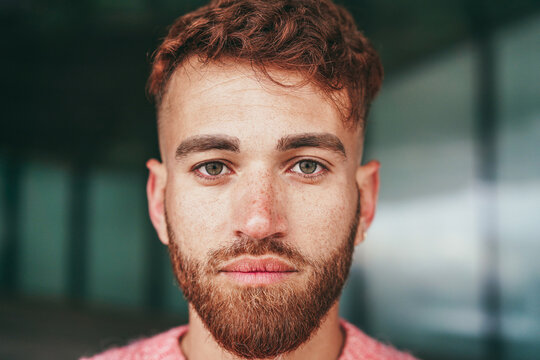

In [419]:
cv2_imshow(image)

In [420]:
#creating mediapipe object
mp_face_detection=mp.solutions.face_detection

In [421]:
with mp_face_detection.FaceDetection(model_selection=0,min_detection_confidence=0.5) as face_detection:
  image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  out=face_detection.process(image_rgb)
  print(out.detections)

[label_id: 0
score: 0.95132643
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.28683722
    ymin: 0.316403985
    width: 0.399106622
    height: 0.598586202
  }
  relative_keypoints {
    x: 0.396753341
    y: 0.472955227
  }
  relative_keypoints {
    x: 0.567024767
    y: 0.464419961
  }
  relative_keypoints {
    x: 0.483355254
    y: 0.608124495
  }
  relative_keypoints {
    x: 0.486470401
    y: 0.739605904
  }
  relative_keypoints {
    x: 0.307603747
    y: 0.54523468
  }
  relative_keypoints {
    x: 0.662301898
    y: 0.528275967
  }
}
]


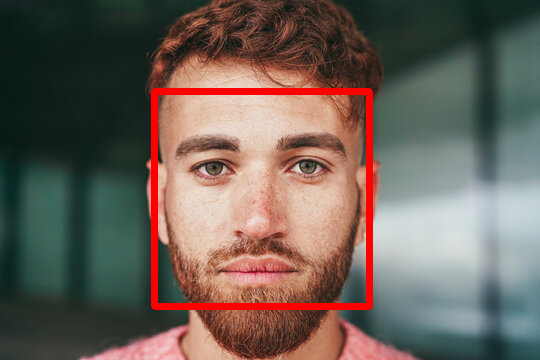

In [422]:
with mp_face_detection.FaceDetection(model_selection=0,min_detection_confidence=0.5) as face_detection:
  image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  out=face_detection.process(image_rgb)

  if out.detections is not None:
    detection=out.detections[0]
    location_data=detection.location_data
    bbox=location_data.relative_bounding_box

    x1,y1,w,h=bbox.xmin , bbox.ymin , bbox.width , bbox.height

    #this is an relative bbox
    x1=int(x1*W)
    y1=int(y1*H*0.8)
    w=int(w*W)
    h=int(h*H)

    image=cv2.rectangle(image,(x1,y1),(x1+w,y1+h),(0,0,255),5)

    cv2_imshow(image)


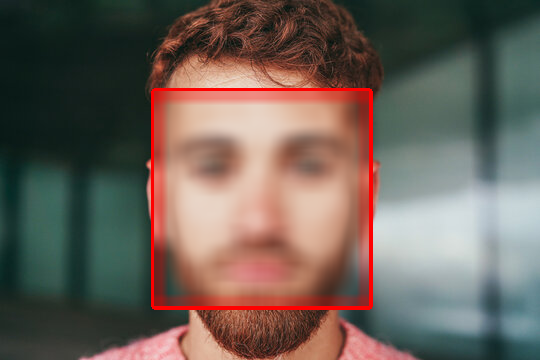

In [423]:
image[y1:y1+h,x1:x1+w,:]=cv2.blur(image[y1:y1+h,x1:x1+w,:],(20,20))
cv2_imshow(image)

In [424]:
def face_anonymizer(image,mp_face_detection):
  H,W,_=image.shape
  with mp_face_detection.FaceDetection(model_selection=0,min_detection_confidence=0.5) as face_detection:

    image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    out=face_detection.process(image_rgb)

    if out.detections is not None:
      detection=out.detections[0]
      location_data=detection.location_data
      bbox=location_data.relative_bounding_box

      x1,y1,w,h=bbox.xmin , bbox.ymin , bbox.width , bbox.height

      #this is an relative bbox
      x1=int(x1*W)
      y1=int(y1*H*0.8)
      w=int(w*W*0.9)
      h=int(h*H*0.9)

      image=cv2.rectangle(image,(x1,y1),(x1+w,y1+h),(0,0,255),5)
      image[y1:y1+h,x1:x1+w,:]=cv2.blur(image[y1:y1+h,x1:x1+w,:],(20,20))

      cv2_imshow(image)


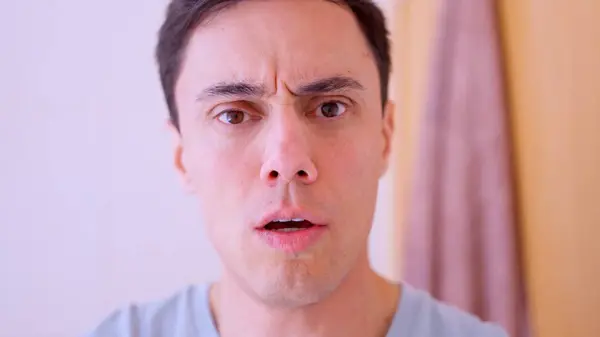

In [425]:
image2=cv2.imread('/depositphotos_792058806-stock-photo-surprised-man-reacting-shock-disbelief.webp')
cv2_imshow(image2)

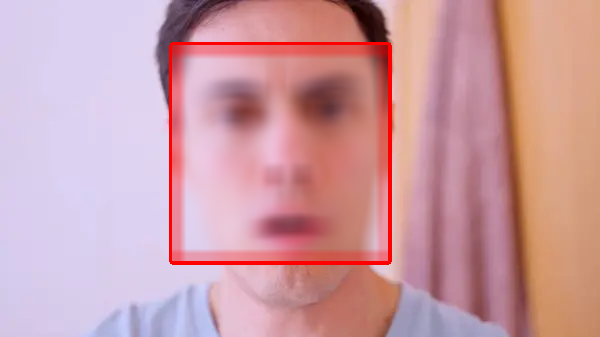

In [426]:
mp_face_detection_2=mp.solutions.face_detection
face_anonymizer(image2,mp_face_detection_2)

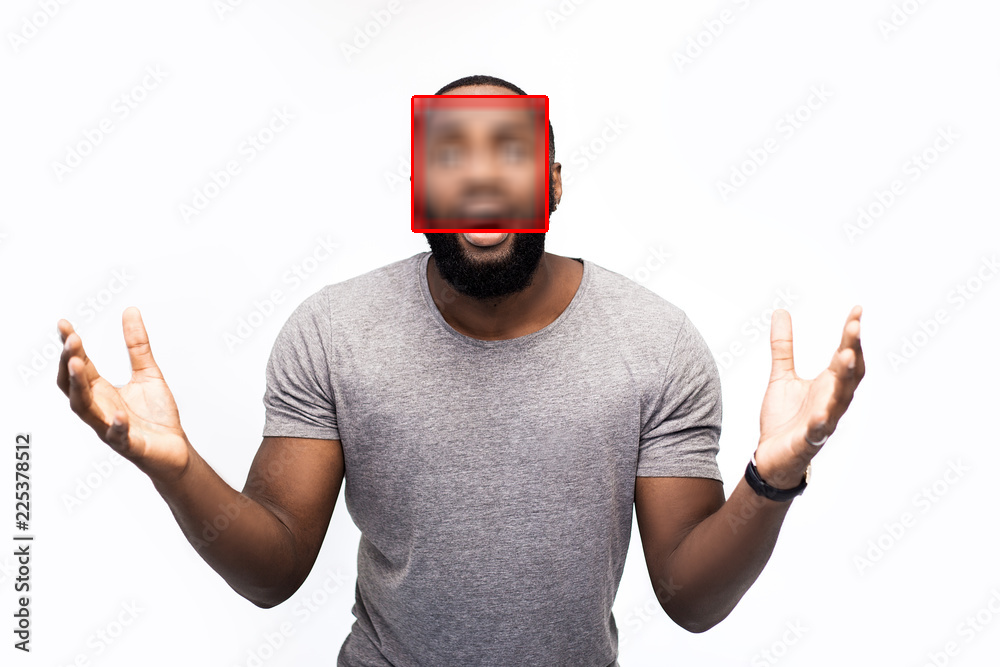

In [427]:
image3=cv2.imread('/1000_F_225378512_ROj5vp4rSoFYZNUGbmdOJfNZwvHHfL0w.jpg')
mp_face_detection_2=mp.solutions.face_detection
face_anonymizer(image3,mp_face_detection_2)